<a href="https://colab.research.google.com/github/abhishurajbhandari/ML-Projects/blob/main/Car_Price_Prediction_(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import os

from google.colab import drive
from pathlib import Path
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Studies/Self_Study/Youtube/ML_Siddhardhan/4.Car_Price_Prediction/car_data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
unique_fuel_type = df['Fuel_Type'].unique()
unique_Seller_Type = df['Seller_Type'].unique()
unique_Transmission = df['Transmission'].unique()
unique_Owner = df['Owner'].unique()

print(unique_fuel_type)
print(unique_Seller_Type)
print(unique_Transmission)
print(unique_Owner)

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [ ]:
df.shape

(301, 9)

In [ ]:
# Checking for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# Checking the distribution of data

print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoading categorical variable

In [ ]:
# Importing the label encoder class

Encoder = LabelEncoder()

In [ ]:
df['Fuel_Type'] = Encoder.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = Encoder.fit_transform(df['Seller_Type'])
df['Transmission'] = Encoder.fit_transform(df['Transmission'])

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
#Dropping Car name and selling price

X = df.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = df[['Selling_Price']]

In [ ]:
print(y)

     Selling_Price
0             3.35
1             4.75
2             7.25
3             2.85
4             4.60
..             ...
296           9.50
297           4.00
298           3.35
299          11.50
300           5.30

[301 rows x 1 columns]


In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          2            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          2            0             1   
3    2011           4.15        5200          2            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          2            0             1   
298  2009          11.00       87934          2            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          2            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting the dataset into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2) # did not use stratify as this is not a classification problem

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape)

(270, 7) (31, 7) (270, 1)


Training our model

In [ ]:
regressor = LinearRegression()

In [ ]:
X_pred = regressor.fit(X_train, y_train)

In [ ]:
#Predicting the training model data
X_train_pred = regressor.predict(X_train)

In [ ]:
#R squared (Comparing predicted vs real)

# We use accuracy score moslty for classification and R squared for regression
r2_error = metrics.r2_score(y_train, X_train_pred)
print('R squared error:', r2_error)

R squared error: 0.8799451660493713


Visualizing the actual prices and predicted prices

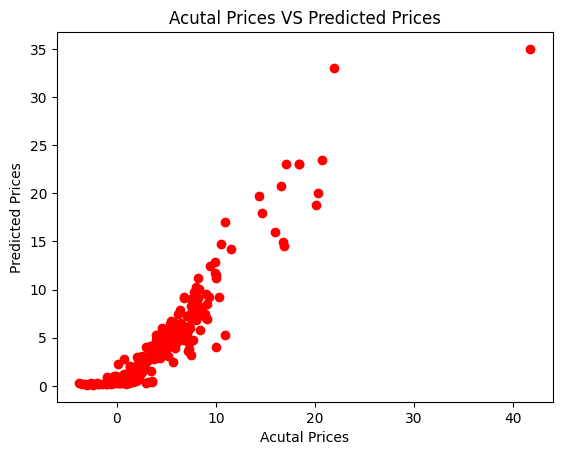

In [ ]:
plt.scatter(X_train_pred, y_train, color = 'Red')
plt.xlabel('Acutal Prices') # The actual prices are y_train
plt.ylabel('Predicted Prices') # The predicted prices are X_train_pred
plt.title('Acutal Prices VS Predicted Prices')
plt.show()

In [ ]:
#Predicting the test data
X_test_pred = regressor.predict(X_test)

In [ ]:
# Comparing the test data with real data
r2_test_error = metrics.r2_score(y_test, X_test_pred)
print('R squared error for testing data:', r2_test_error)

R squared error for testing data: 0.8365766715027033


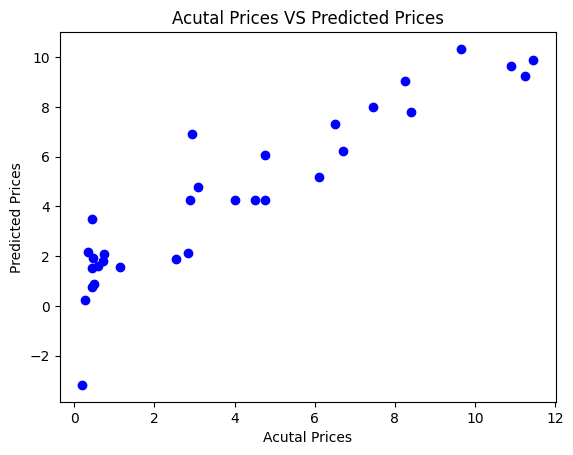

In [ ]:
plt.scatter(y_test, X_test_pred, c = 'Blue')
plt.xlabel('Acutal Prices') # The actual prices are y_train
plt.ylabel('Predicted Prices') # The predicted prices are X_train_pred
plt.title('Acutal Prices VS Predicted Prices')
plt.show()